In [13]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import csv


colors = plt.rcParams['axes.prop_cycle'].by_key()['color'] 

In [14]:
def read_txt(filepath):
    file = open(filepath)
    csvreader = csv.reader(file)
    rows = []
    for row in csvreader:
        rows.append(row)
    file.close()
    return rows

def read_output(filepath):
    txt_rows = read_txt(filepath)
    df = pd.DataFrame(txt_rows[0:], columns=['time', 'generation'])
    df = df.astype({'time': float, 'generation': int})
    return df

In [15]:
folder = "2d"

In [16]:
rows = read_txt(f'{folder}/GenStats.txt')
df = pd.DataFrame(rows[0:], columns=['time', 'generation'])
df = df.astype({'time': float, 'generation': int})
df.head()

,time,generation
0,0.00,1
1,5.02,1
2,5.02,1
3,5.02,1
4,5.02,1


In [17]:
df = df.groupby(['time', 'generation']).size().reset_index(name='count')
df

,time,generation,count
0,0.00,1,1
1,5.02,1,6
2,5.94,1,6
3,6.78,1,6
4,7.56,1,6
...,...,...,...
86734,3141.02,6,7
86735,3141.02,7,6
86736,3141.02,8,4
86737,3141.02,9,1


In [18]:
df_stack = pd.DataFrame()
df_stack['time'] = df['time'].unique()
for i in range(1, df["generation"].max()+1):
    df_temp = df[df['generation'] == i][['time', 'count']]
    df_temp = df_temp.rename(columns={'count': 'generation ' + str(i)})
    df_stack = pd.merge(df_stack, df_temp, on='time', how='left')
df_stack = df_stack.fillna(0)
df_stack

,time,generation 1,generation 2,generation 3,generation 4,generation 5,generation 6,generation 7,generation 8,generation 9,generation 10,generation 11
0,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.02,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.94,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.78,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7.56,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11970,3139.98,0.0,0.0,1.0,5.0,5.0,7.0,6.0,4.0,1.0,2.0,0.0
11971,3140.24,0.0,0.0,1.0,5.0,5.0,7.0,6.0,4.0,1.0,2.0,0.0
11972,3140.50,0.0,0.0,1.0,5.0,5.0,7.0,6.0,4.0,1.0,2.0,0.0
11973,3140.76,0.0,0.0,1.0,5.0,5.0,7.0,6.0,4.0,1.0,2.0,0.0


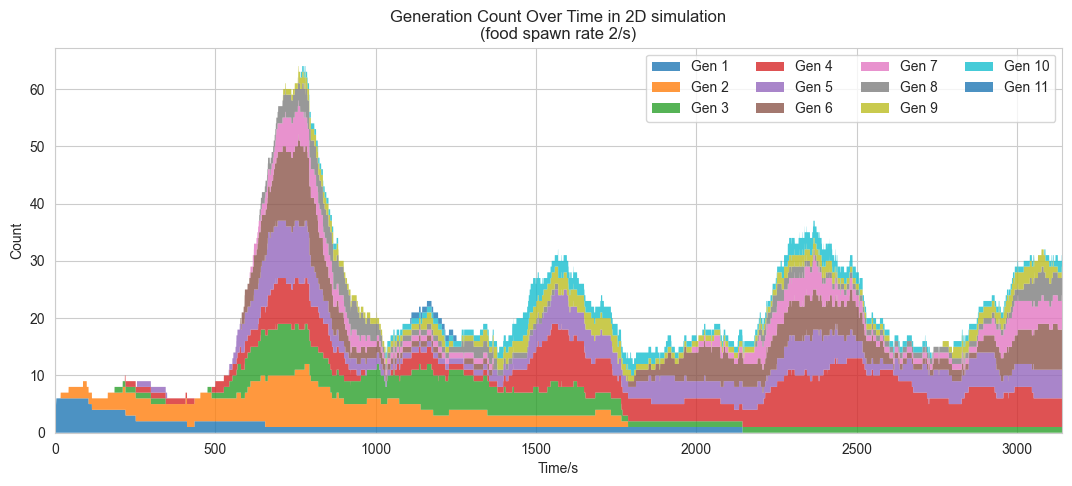

In [20]:
plt.figure(figsize=(13, 5))
plt.stackplot(df_stack['time'], df_stack.iloc[:, 1:].T, labels=['Gen ' + str(i) for i in range(1, df["generation"].max()+1)], alpha=0.8, colors=colors, edgecolor='none')
plt.xlim(0, df_stack['time'].max())
plt.xlabel('Time/s')
plt.ylabel('Count')
plt.title('Generation Count Over Time in 2D simulation\n(food spawn rate 2/s)')
plt.legend(ncol=4)

In [22]:
rows = read_txt(f'{folder}/LifeStats.txt')
df2 = pd.DataFrame(rows[0:], columns=['generation', 'alive time'])
df2 = df2.astype({'generation': int, 'alive time': float})
df2.head()

,generation,alive time
0,2,78.06467
1,1,102.27090
2,1,112.68280
3,1,133.35840
4,1,217.29000


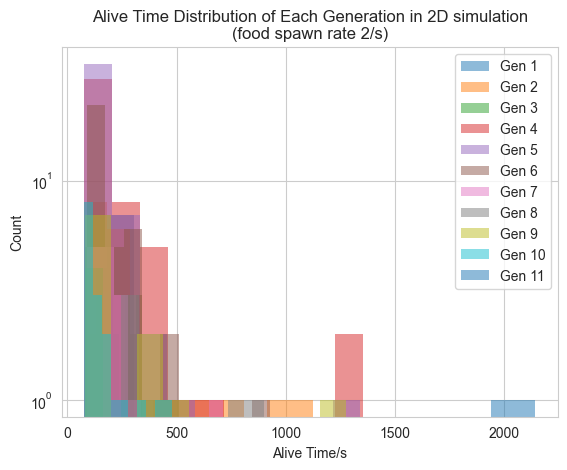

In [23]:
for i in range(1, df2['generation'].max()+1):
    plt.hist(df2[df2['generation'] == i]['alive time'], bins=10, alpha=0.5, label='Gen ' + str(i), log=True,  edgecolor='none')
    
plt.xlabel('Alive Time/s')
plt.ylabel('Count')
plt.title('Alive Time Distribution of Each Generation in 2D simulation\n(food spawn rate 2/s)')
plt.legend()

In [24]:
# group by generation and calculate the average alive time and error, and median alive time
df2_alive_time = df2.groupby('generation').agg({'alive time': ['mean', 'std', 'median']}).reset_index()
df2_alive_time.columns = ['generation', 'mean', 'error', 'median']
df2_alive_time

,generation,mean,error,median
0,1,430.685713,694.041497,217.34680
1,2,338.839834,313.614459,213.35125
2,3,193.316103,77.328457,187.51580
3,4,250.204453,258.430273,159.85615
4,5,199.283939,198.887679,144.78440
5,6,205.155063,157.884879,140.55760
6,7,208.177716,151.324870,171.26620
7,8,336.095438,288.570033,276.19520
8,9,312.156748,342.437929,181.50770
9,10,176.266365,120.385803,122.91970


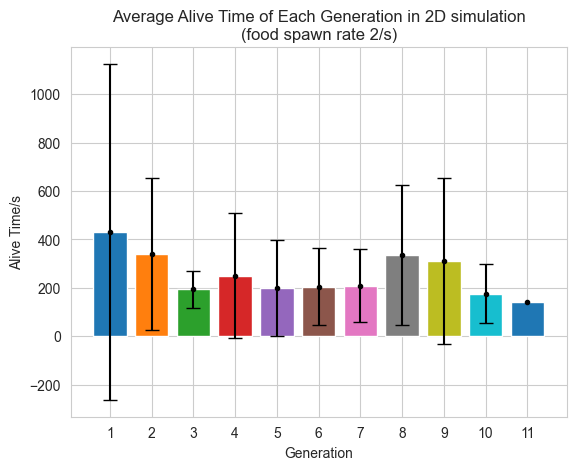

In [25]:
plt.bar(df2_alive_time['generation'], df2_alive_time['mean'], color=colors)
plt.errorbar(df2_alive_time['generation'], df2_alive_time['mean'], yerr=df2_alive_time['error'], fmt='.', color='black', capsize=5)
plt.xlabel('Generation')
plt.xticks(range(1, df2['generation'].max()+1))
plt.ylabel('Alive Time/s')
plt.title('Average Alive Time of Each Generation in 2D simulation\n(food spawn rate 2/s)')
plt.show()

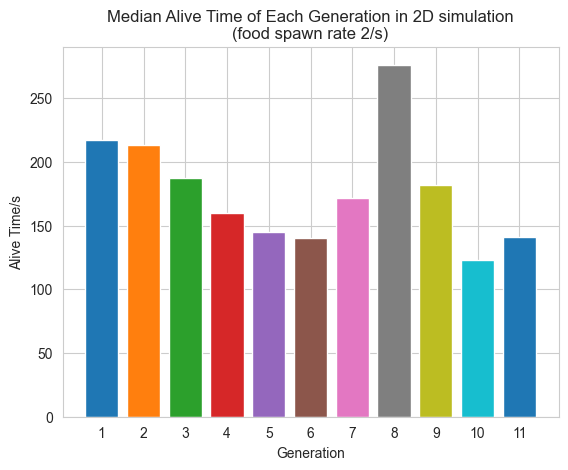

In [26]:
plt.bar(df2_alive_time['generation'], df2_alive_time['median'], color=colors)
plt.xlabel('Generation')
plt.xticks(range(1, df2['generation'].max()+1))
plt.ylabel('Alive Time/s')
plt.title('Median Alive Time of Each Generation in 2D simulation\n(food spawn rate 2/s)')
plt.show()

In [27]:
df2_alive_time

,generation,mean,error,median
0,1,430.685713,694.041497,217.34680
1,2,338.839834,313.614459,213.35125
2,3,193.316103,77.328457,187.51580
3,4,250.204453,258.430273,159.85615
4,5,199.283939,198.887679,144.78440
5,6,205.155063,157.884879,140.55760
6,7,208.177716,151.324870,171.26620
7,8,336.095438,288.570033,276.19520
8,9,312.156748,342.437929,181.50770
9,10,176.266365,120.385803,122.91970


In [28]:
rows = read_txt(f'{folder}/FoodPopulationStats.txt')
df3 = pd.DataFrame(rows[0:], columns=['time', 'population', 'food'])
df3 = df3.astype({'time': float, 'population': int, 'food': int})
df3.head()

,time,population,food
0,0.00,1,151
1,5.02,6,155
2,5.94,6,156
3,6.78,6,158
4,7.56,6,160


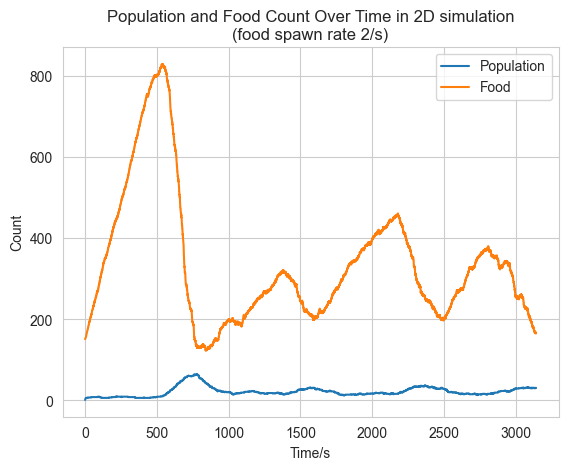

In [29]:
plt.plot(df3['time'], df3['population'], label='Population', color=colors[0])
plt.plot(df3['time'], df3['food'], label='Food', color=colors[1])
plt.xlabel('Time/s')
plt.ylabel('Count')
plt.title('Population and Food Count Over Time in 2D simulation\n(food spawn rate 2/s)')
plt.legend()
plt.show()

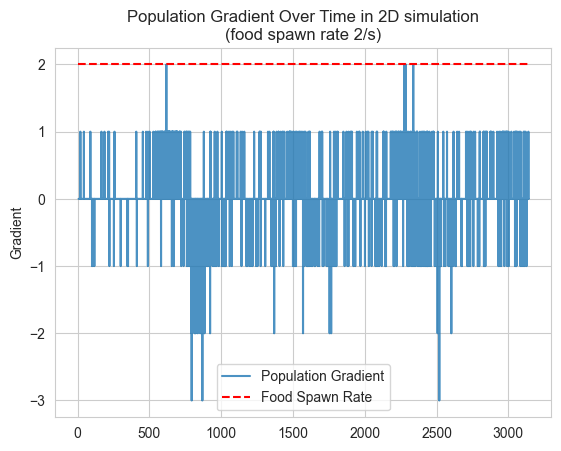

In [30]:
# plot gradient of population and food
df3['population_gradient'] = df3['population'].diff()
df3['food_gradient'] = df3['food'].diff()
plt.plot(df3['time'][2:], df3['population_gradient'][2:], label='Population Gradient', color=colors[0], alpha=0.8)
plt.hlines(2, 0, df3['time'].max(), color='red', linestyles='dashed', alpha=1, label='Food Spawn Rate')
plt.ylabel('Gradient')
plt.title('Population Gradient Over Time in 2D simulation\n(food spawn rate 2/s)')
plt.legend()
plt.show()